# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [34]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [102]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [103]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [37]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [77]:
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [39]:
df['booking_complete'].unique()

array([0, 1], dtype=int64)

In [57]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [107]:
df.sales_channel.value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [104]:
df['trip_type'].unique()


array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [106]:
df.trip_type.value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [72]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [43]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [44]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [71]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip'],
      dtype='object')

In [91]:
#Implementing One-Hot Encoding on the sales_channel and trip_type

columns_to_encode = ['sales_channel', 'trip_type']

# Use the pd.get_dummies() function to perform one-hot encoding
df_enc = pd.get_dummies(df, columns=columns_to_encode)



df_enc.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False,False,False,True
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True


In [95]:
cols = ['sales_channel_Internet', 'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip']


df_enc[cols] = df_enc[cols].astype(int)
df_enc

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1


# Building RandomForest Model for Booking Predictions

In [113]:
x = df_enc.drop(["booking_complete", "route", "booking_origin"], axis = 1)
y = df_enc.booking_complete

In [138]:
x.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip'],
      dtype='object')

In [125]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

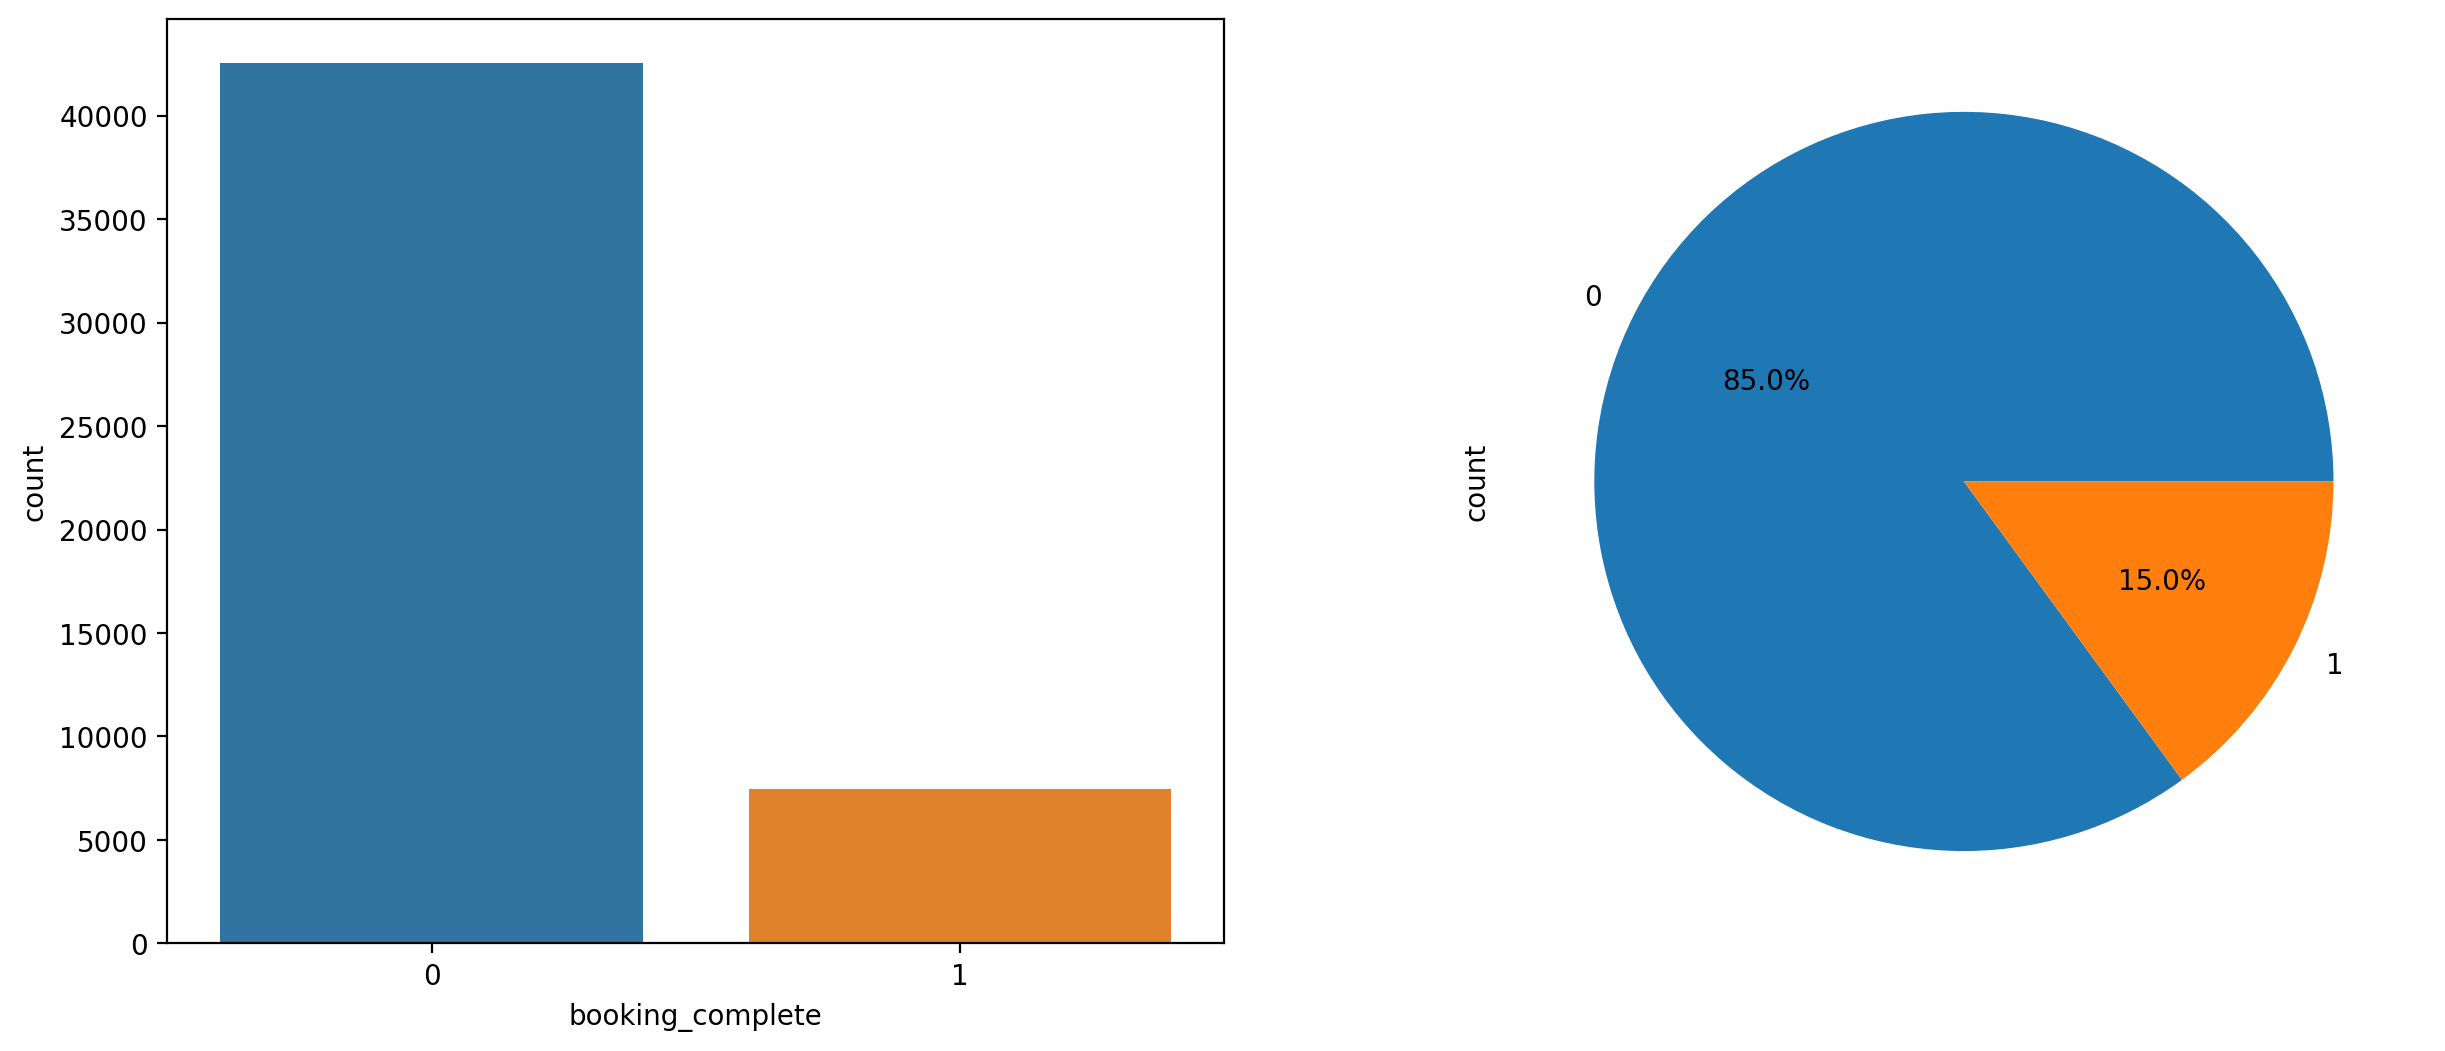

In [124]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for th
a = sns.countplot(x = 'booking_complete', data = df_enc, ax=ax_position[0]) #ax_position[0] spe
a = df_enc['booking_complete'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

# Using SMOTE to balance the data

In [126]:
#import SMOTE to balance out the data

from imblearn.over_sampling import SMOTE
SM = SMOTE(random_state = 42, k_neighbors = 2)

In [127]:
x_res, y_res = SM.fit_resample(x, y)

x, y = x_res, y_res

In [128]:
y.value_counts()

booking_complete
0    42522
1    42522
Name: count, dtype: int64

In [132]:
# Metrics to evaluate the model


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [133]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Booked', 'Not_Booked'], yticklabels = ['Booked', 'Not_Booked'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [134]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split


# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=0)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8505
           1       0.91      0.87      0.89      8504

    accuracy                           0.89     17009
   macro avg       0.89      0.89      0.89     17009
weighted avg       0.89      0.89      0.89     17009



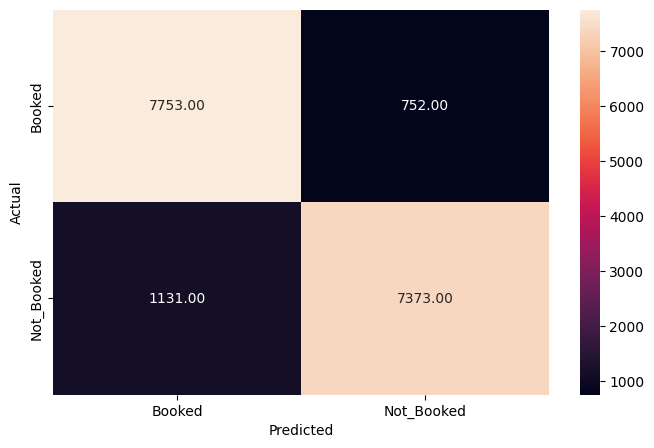

In [135]:
# Training the best model and calculating accuracy on test data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

# train the model
rf.fit(x_train, y_train)


# make predictions on the test data
y_pred = rf.predict(x_test)


# check metrics
metrics_score(y_test, y_pred)


# Using Cross-validation to Evaluate the model

In [140]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your features and target variable, X and y, ready

# Define your model, e.g., a Random Forest Classifier
model = rf

# Define the cross-validation strategy (e.g., StratifiedKFold for balanced folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute the scores using an appropriate metric (e.g., accuracy, F1-Score, etc.)
scores = cross_val_score(model, x, y, cv=cv, scoring='f1_macro')  # You can choose a different scoring metric

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Score: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")


Cross-Validation Scores: [0.88890232 0.88800937 0.89320588 0.89366306 0.88772762]
Mean Score: 0.89
Standard Deviation: 0.00


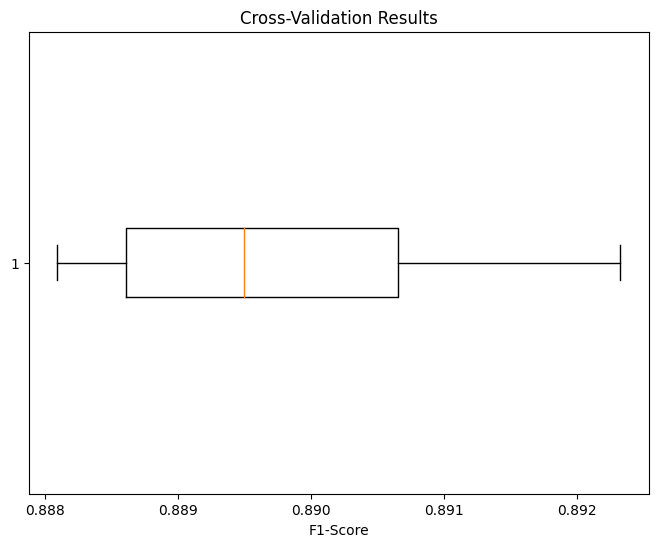

In [137]:
import matplotlib.pyplot as plt

# Replace these with your actual cross-validation scores
cross_val_scores = [0.88860898, 0.88949045, 0.89232477, 0.89065484, 0.88808552]

# Create a box plot of the cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(cross_val_scores, vert=False)
plt.title('Cross-Validation Results')
plt.xlabel('F1-Score')
plt.show()


# Visualization of Feature Importances

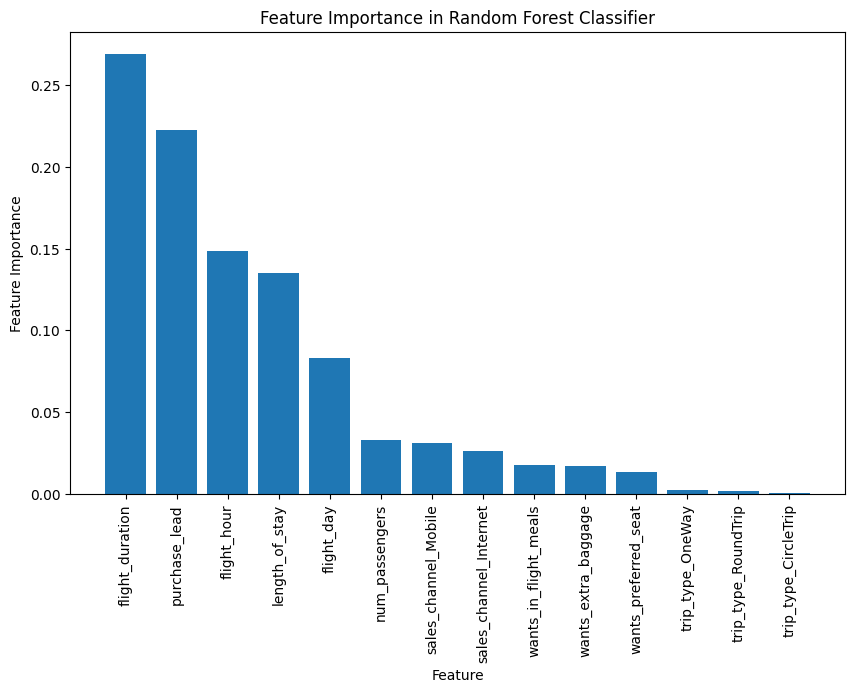

In [139]:
feature_importance = rf.feature_importances_

# Get the names of the features (assuming you have a list of feature names)
feature_names = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip']  # Replace with your feature names

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()